In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import os

TRACES_DIR = "../traces"

Token distributions

In [4]:
def plot_token_dist():
    traces_list = []
    titles = []

    for file in os.listdir(TRACES_DIR):
        file_path = os.path.join(TRACES_DIR, file)
        rr = int(file.split("_")[2].split(".")[0])
        data = pd.read_csv(file_path)

        traces_list.append(data)
        titles.append(rr)
        
    # Calculate the number of rows and columns required for subplots
    num_traces = len(traces_list)
    num_cols = 2  # Number of columns (you can adjust this if you want a different layout)
    num_rows = math.ceil(num_traces / num_cols)

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows))
    axs = axs.flatten()  

    for i, traces in enumerate(traces_list):
        data = {
            'timestamp': traces['arrival_timestamp'],
            'prompt_tokens': traces['prompt_size'],
            'response_tokens': traces['token_size']
        }
        df = pd.DataFrame(data)

        axs[i].plot(df['timestamp'], df['prompt_tokens'], marker='o', color='#1f77b4', label='Prompt Tokens')
        axs[i].plot(df['timestamp'], df['response_tokens'], marker='o', color='#ff7f0e', label='Response Tokens')

        axs[i].set_title(f'Rate of {titles[i]} requests/s', fontsize=10)
        axs[i].set_xlabel('Time Slice', fontsize=10)
        axs[i].set_ylabel('Tokens', fontsize=10)

    for j in range(num_traces, len(axs)):
        axs[j].axis('off')

    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, frameon=True, edgecolor='black')

    plt.tight_layout()

    plt.show()

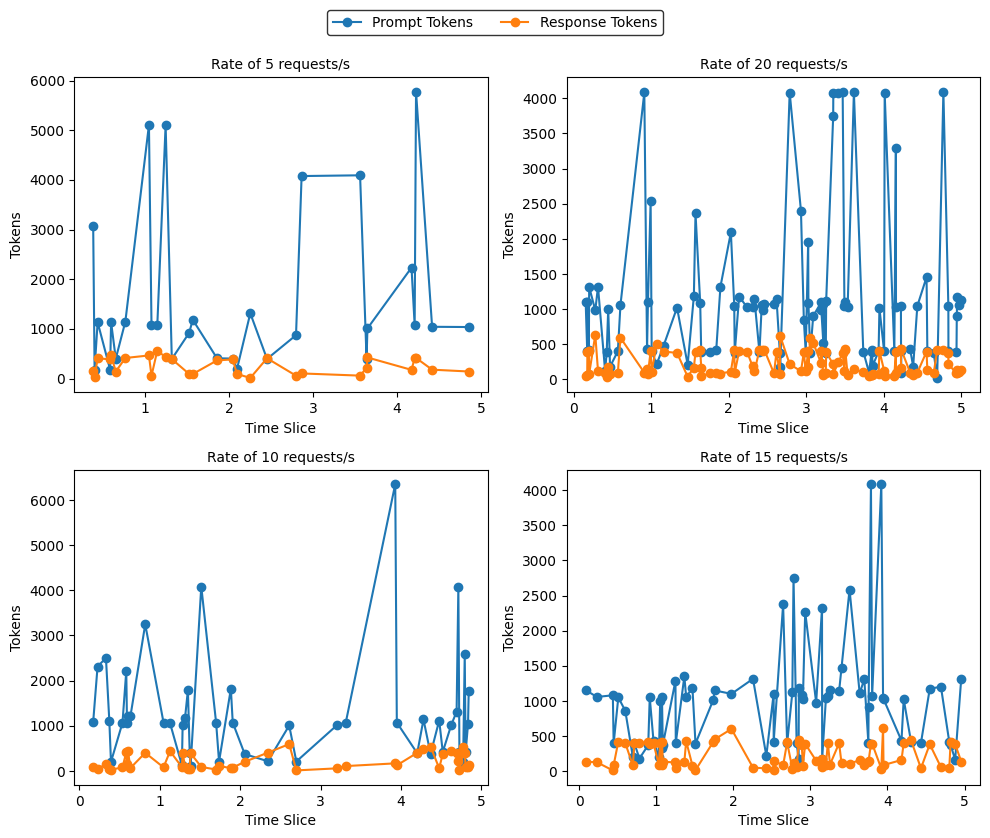

In [5]:
plot_token_dist()